In [1]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr as pearr

1 GSTT1
2 GSTT2
3 PILRA
4 DOPEY2
5 XKR9
6 FAM118A
FAM118A - UTMOST R sqr : 0.70042


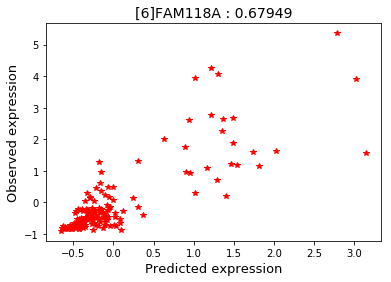

7 C17orf97
8 DDT
9 PKN3
10 THNSL2


In [32]:
trial_num = 5
model_num = 14
tissue_num = 27

ensg_name = json.load(open('whole_ensg2name.json'))
name_rsqr = json.load(open('top10_name2rsqr.json'))

gene_data_name = 'UTMOST_top10_Liver'
gene_list = os.listdir('../%s/'%gene_data_name)

r_list = []
r_ref_list = []
for g in range(len(gene_list)):
    gene_num = g+1
    gene_name = gene_list[g]
    gene_real_name = ensg_name[gene_name]
    gene_r_score = name_rsqr[gene_real_name]
    r_ref_list.append(gene_r_score)
    
    print(gene_num, gene_real_name)
    GX_observed = np.array([])
    GX_predicted = np.array([])

    for k in range(5):
        k_num = k+1

        try:
            SNP2_tr = np.load('npy/trial%d/gene%d/model%d/%dtissue_trSNP2_k%d.npy'\
                              %(trial_num, gene_num, model_num, tissue_num, k_num))
            SNP2_te = np.load('npy/trial%d/gene%d/model%d/%dtissue_teSNP2_k%d.npy'\
                              %(trial_num, gene_num, model_num, tissue_num, k_num))
        except FileNotFoundError:
            print('%d _ last saved snp2 loaded.'%gene_num)
            SNP2_tr = np.load('npy/trial%d/gene%d/model%d/%dtissue_trSNP2_k%d_last.npy'\
                              %(trial_num, gene_num, model_num, tissue_num, k_num))
            SNP2_te = np.load('npy/trial%d/gene%d/model%d/%dtissue_teSNP2_k%d_last.npy'\
                              %(trial_num, gene_num, model_num, tissue_num, k_num))

        GX_tr = np.load('npy/trial%d/gene%d/model%d/%dtissue_trGX_k%d.npy'\
                        %(trial_num, gene_num, model_num, tissue_num, k_num))
        GX_te = np.load('npy/trial%d/gene%d/model%d/%dtissue_teGX_k%d.npy'\
                        %(trial_num, gene_num, model_num, tissue_num, k_num))

        GX_observed = np.append(GX_observed, np.reshape(GX_te, -1))
        GX_predicted = np.append(GX_predicted, np.reshape(SNP2_te, -1))
    R_, p = pearr(GX_observed, GX_predicted)
    R2 = R_**2
    
    r_list.append(R2)
    
#     if gene_num==1:
    if R2>0.65:
        print('%s - UTMOST R sqr : %.5f'%(gene_real_name, gene_r_score))
        plt.plot(GX_predicted, GX_observed, 'r*')
        plt.title('[%d]%s : %.5f'%(gene_num, gene_real_name, R2), fontsize=14)
        plt.xlabel('Predicted expression', fontsize=13)
        plt.ylabel('Observed expression', fontsize=13)
        plt.savefig('img/trial%d/Scatter_model%d_gene%d.png'%(trial_num, model_num, gene_num))
        plt.show()

0.5506455676458581 0.556026897275542


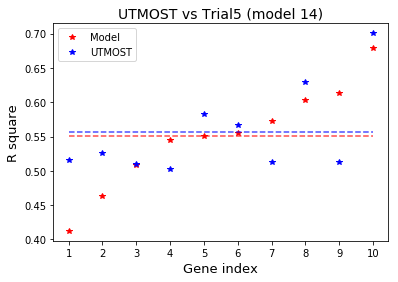

In [33]:
avg_model = np.mean(np.array(r_list))
avg_utmost = np.mean(np.array(r_ref_list))
print(avg_model, avg_utmost)

plt.title('UTMOST vs Trial%d (model %d)'%(trial_num, model_num), fontsize=14)
plt.plot(np.array(r_list)[np.argsort(r_list)], 'r*', label='Model')
plt.plot(np.array(r_ref_list)[np.argsort(r_list)], 'b*', label='UTMOST')
plt.plot([0,9],[avg_model, avg_model], 'r--', alpha=0.7)
plt.plot([0,9],[avg_utmost, avg_utmost], 'b--', alpha=0.7)
plt.xticks(np.arange(10),np.arange(10)+1)
plt.xlabel('Gene index', fontsize=13)
plt.ylabel('R square', fontsize=13)
plt.legend()
plt.savefig('img/trial%d/vsUTMOST_model%d.png'%(trial_num, model_num))
plt.show()